![Explanation for you <3](https://s3.us-east-2.amazonaws.com/journeynorth.org/images/graphics/mclass/Lat_Long.gif)

In [1]:
import json
import os
from matplotlib import pyplot as plt
import pandas as pd


In [2]:

# open all.json Update the image list from nasa
# os.system("wget -r https://epic.gsfc.nasa.gov/api/enhanced/all")
# os.rename("epic.gsfc.nasa.gov/api/enhanced/all", "epic.gsfc.nasa.gov/api/enhanced/all.json")


In [3]:

def contruct_date_list(): 
    dates = []
    with open("epic.gsfc.nasa.gov/api/enhanced/all.json") as f:
        data = json.load(f)
        for d in data:
            dates.append(d["date"])
    return dates

dates = contruct_date_list()
            
image_folders = []
# construct all image folder urls
for d in dates:
    image_folders.append(f"https://epic.gsfc.nasa.gov/api/enhanced/date/{d}")
print(len(image_folders))
print(len(dates))
print(image_folders[0])


13044
13044
https://epic.gsfc.nasa.gov/api/enhanced/date/2025-01-30


In [4]:
# PLEASE REMOVE DUPLICATES !!!!!111!!!11!1!1! Danger Below
# make all image folders
''' os.system("mkdir images")
for i in range(len(dates)):
    os.system(f"mkdir images/{dates[i]}")
    os.system(f"wget -P images/{dates[i]} {image_folders[i]}")
    os.system(f"mv images/{dates[i]}/{dates[i]} images/{dates[i]}/{dates[i]}.json") '''


' os.system("mkdir images")\nfor i in range(len(dates)):\n    os.system(f"mkdir images/{dates[i]}")\n    os.system(f"wget -P images/{dates[i]} {image_folders[i]}")\n    os.system(f"mv images/{dates[i]}/{dates[i]} images/{dates[i]}/{dates[i]}.json") '

In [5]:
folders = os.listdir("images")
folders.sort()
if ".DS_Store" in folders:
    folders.remove(".DS_Store")
len(folders)
for i in range(len(folders)):
    os.system(f"cp images/{folders[i]}/{folders[i]}.json combined")


In [6]:
files = os.listdir("combined")
if ".DS_Store" in files:
    files.remove(".DS_Store")

In [7]:
lat_coordinates = []
lon_coordinates = []
for i in range(len(files)):
    with open(f"combined/{files[i]}") as f:
        data = json.load(f)
        for p in range(len(data)):
            lat_coordinates.append(data[p]["centroid_coordinates"]["lat"])
            lon_coordinates.append(data[p]["centroid_coordinates"]["lon"])

        

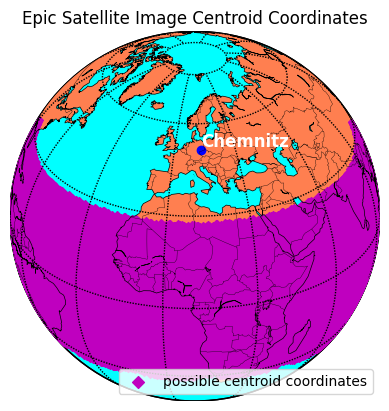

In [8]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# set up orthographic map projection with
# perspective of satellite looking down at 45N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho', lat_0=30, lon_0=10, resolution='c')

# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral', lake_color='aqua')

# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')

# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

# Plot lon and lat coordinates on the map. Somehow its lon first and then lat
x, y = map(lon_coordinates, lat_coordinates)
map.scatter(x, y, marker='D', color='m', label="possible centroid coordinates")

p, q = map(12.916667, 50.833332)
map.scatter(p, q, marker="o", color="b")

# Add label for the point p, q
plt.text(p, q, "Chemnitz", fontsize=12, ha='left', va='bottom', color='white', weight="bold")

# plot labels
plt.title("Epic Satellite Image Centroid Coordinates")
plt.legend()
plt.show()


In [9]:
df_lat = pd.DataFrame(lat_coordinates)
df_lon = pd.DataFrame(lon_coordinates)
print("lat describe: ")
print(df_lat.describe())
print("---------------")
print("lon describe: ")
print(df_lon.describe())

lat describe: 
                  0
count  39359.000000
mean       4.399146
std       16.958279
min      -29.274902
25%       -9.228516
50%        8.811035
75%       19.519043
max       26.770020
---------------
lon describe: 
                  0
count  39359.000000
mean       3.941364
std      101.847247
min     -179.963379
25%      -83.803711
50%        5.866699
75%       91.567383
max      180.000000


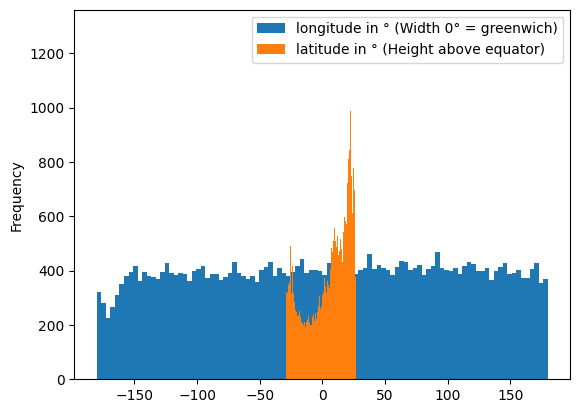

In [10]:
# make distribution of lat and lon
plt.hist(lon_coordinates, bins=100, label="longitude in ° (Width 0° = greenwich)")
plt.ylabel("Frequency")
plt.hist(lat_coordinates, bins=100, label="latitude in ° (Height above equator)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [11]:
import time
import datetime
import json
import os
import random
import numpy as np
import webbrowser
from PIL import Image
import matplotlib.pyplot as plt
from rich.progress import track
import subprocess
import pandas as pd
import torch
import torch.nn as nn
import torchvision
from torchvision.utils import save_image, make_grid
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchinfo import summary
from torch.utils.tensorboard import SummaryWriter

In [12]:

# Prepare the images for appending the coordinates
for i in range(len(files)):
    with open(f"combined/{files[i]}") as f:
        data = json.load(f)
        for p in range(len(data)):
            # print(data[p]["image"] + ".png")
            lat_coordinates.append(data[p]["centroid_coordinates"]["lat"])
            lon_coordinates.append(data[p]["centroid_coordinates"]["lon"])
        for j in range(len(data)):
            image_name = data[j]["image"]
            lat = data[j]["centroid_coordinates"]["lat"]
            lon = data[j]["centroid_coordinates"]["lon"]
            new_image_name = f"{image_name}_{lat}_{lon}.png"
            os.system(f"cp download/earth/{image_name}.png pics_with_coords/all/{new_image_name}")

cp: download/earth/epic_RGB_20160722010436.png: No such file or directory
cp: download/earth/epic_RGB_20160722021004.png: No such file or directory
cp: download/earth/epic_RGB_20160722031532.png: No such file or directory
cp: download/earth/epic_RGB_20160722042059.png: No such file or directory
cp: download/earth/epic_RGB_20160722052627.png: No such file or directory
cp: download/earth/epic_RGB_20160722063154.png: No such file or directory
cp: download/earth/epic_RGB_20160722073722.png: No such file or directory
cp: download/earth/epic_RGB_20160722084249.png: No such file or directory
cp: download/earth/epic_RGB_20160722094817.png: No such file or directory
cp: download/earth/epic_RGB_20160722105344.png: No such file or directory
cp: download/earth/epic_RGB_20160722115912.png: No such file or directory
cp: download/earth/epic_RGB_20160722172628.png: No such file or directory
cp: download/earth/epic_RGB_20160722183156.png: No such file or directory
cp: download/earth/epic_RGB_2016072219

In [ ]:
from LocationRegressor import LocationRegressor

trans = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.Grayscale(),
        transforms.ToTensor()
    ])

model = LocationRegressor()
summary(model, input_size=(1, 1, 64, 64))

In [33]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.000001)

dataset = ImageFolder(root="pics_with_coords", transform=trans)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

In [ ]:

'''
# Test run to see if the model is working
for x, _ in dataloader:
    print(model(x).detach().numpy())
    # print coords of the image
    data_iter = iter(dataloader)
    data = next(data_iter)

    img = dataset.imgs[0]
    print(img)
    print("lat:", img[0].split("/")[-1].strip(".png").split("_")[-2], "lon:", img[0].split("/")[-1].strip(".png").split("_")[-1])
    break
'''

# 1. Pass image through model
# 2. Get the predicted lat and lon
# 3. Extract the actual lat and lon from the image name
# 4. Calculate the loss between the predicted and actual lat and lon
# 5. Backpropagate the loss
# 6. Update the weights
# 7. Repeat for all images
model = model.to("mps")

acc_list = []
# Training loop
for epoch in range(1):
    try:
        for i, (x, _) in enumerate(dataloader):
            try:
                for param in model.parameters():
                    param.grad = None
                x = x.to("mps")
                pred = model(x)
                lat = float(dataset.imgs[i][0].split("/")[-1].strip(".png").split("_")[-2])
                lon = float(dataset.imgs[i][0].split("/")[-1].strip(".png").split("_")[-1])
                loss = criterion(pred, torch.tensor([lat, lon]).to("mps"))
                loss.backward()
                optimizer.step()
                
                print(loss.item())
                acc_list.append(loss.item())
            except:
                pass
    except:
        pass       


plt.plot(acc_list)
plt.show()

In [ ]:
'''
# Model training
for epoch in range(10):
    for x, _ in dataloader:
        optimizer.zero_grad()
        y_pred = model(x)
        print(y_pred)
'''

img_num = random.randint(0, len(os.listdir("pics_with_coords/all")))

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Print image from pics_with_coords/all folder with coordinates
img_coords = os.listdir("pics_with_coords/all")
img = Image.open(f"pics_with_coords/all/{img_coords[img_num]}")
axs[0].imshow(img)
axs[0].set_title(f'lat: {img_coords[img_num].split("/")[-1].strip(".png").split("_")[-2]}, lon: {img_coords[img_num].split("/")[-1].strip(".png").split("_")[-1]}')

# set up orthographic map projection with
# perspective of satellite looking down at 45N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho', lat_0=float(img_coords[img_num].split("/")[-1].strip(".png").split("_")[-2]), lon_0=float(img_coords[img_num].split("/")[-1].strip(".png").split("_")[-1]), resolution='c', ax=axs[1])

# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral', lake_color='aqua')

# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')

# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

p, q = map(float(img_coords[img_num].split("/")[-1].strip(".png").split("_")[-1]), float(img_coords[img_num].split("/")[-1].strip(".png").split("_")[-2]))
map.scatter(p, q, marker="o", color="b", label="True centroid coordinates")

# Print models prediction
# Load the image using torchvision
img_tensor = trans(img).unsqueeze(0).to("mps")

# Get the model's prediction
model.eval()
with torch.no_grad():
    pred_coords = model(img_tensor).cpu().numpy().flatten()

p_pred, q_pred = map(pred_coords[1], pred_coords[0])
map.scatter(p_pred, q_pred, marker="D", color="m", label="Predicted centroid coordinates")

# plot labels
axs[1].set_title("Epic Satellite Image Centroid Coordinates")
plt.legend(loc='lower left')
plt.show()